In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('wiki-RfA.csv', index_col=0, parse_dates=['Date'])
df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


# Time series visualisation

### Handle missing data

In [4]:
voting_time = (df.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')

# add voting time to df dataframe, merge on index
df_timeserie = df.join(voting_time.droplevel(0))
df_timeserie

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,48.633333
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,0.000000
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,NaN
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,197.883333


The voting_time series gives the time in minute at which each vote was cast compared to the first vote recorded for the same target (we consider this as the opening of the polls). Thus, for each target we should have a voting_time of 0.

In [5]:
# Convert Vote, Results and Year to int
df_timeserie['Vote'] = df_timeserie['Vote'].astype(int)
df_timeserie['Results'] = df_timeserie['Results'].astype(int)
df_timeserie['Year'] = df_timeserie['Year'].astype(int)

In [6]:
# Plot basic statistics
df_timeserie['Voting_time'].describe().round(2)

count    187998.00
mean       1924.74
std        5943.52
min           0.00
25%          10.50
50%          46.80
75%         157.97
max       72598.02
Name: Voting_time, dtype: float64

In [7]:
# Targets where all voting times are NaN
nan_target = set(df_timeserie.Target.unique()) - set(df_timeserie[~df_timeserie['Voting_time'].isna()].Target.unique())
print('Number of target without time data:', len(nan_target), ', corresponding to', round(len(nan_target)/len(df_timeserie.Target.unique())*100, 2), '% of all targets')
print('Target without time data:', nan_target)

# Amount of NaN values in the voting time column
print('Number of NaN values in the voting time column:', df_timeserie['Voting_time'].isna().sum(), ', corresponding to', round(df_timeserie['Voting_time'].isna().sum()/len(df_timeserie)*100, 2), '% of all values')

Number of target without time data: 23 , corresponding to 0.66 % of all targets
Target without time data: {'Schneelocke', 'Mintguy', 'CYD', 'Craigy144', 'Zanimum', 'Fantasy', 'Bishonen', 'Olivier', 'RickK', 'Chadloder', 'Starblind', 'wavelab1', 'Cyan', 'Tompagenet', 'Noel', 'Feco', 'Delirium', 'Woohookitty', 'Talrias', 'Vsmith', 'J.J.', 'Dori', 'Jdforrester'}
Number of NaN values in the voting time column: 7649 , corresponding to 3.91 % of all values


In [8]:
# Remove NaN values in the voting time column
df_timeserie = df_timeserie[~df_timeserie['Voting_time'].isna()]

## Distribution of the voting time

In [9]:
warnings.filterwarnings('ignore')

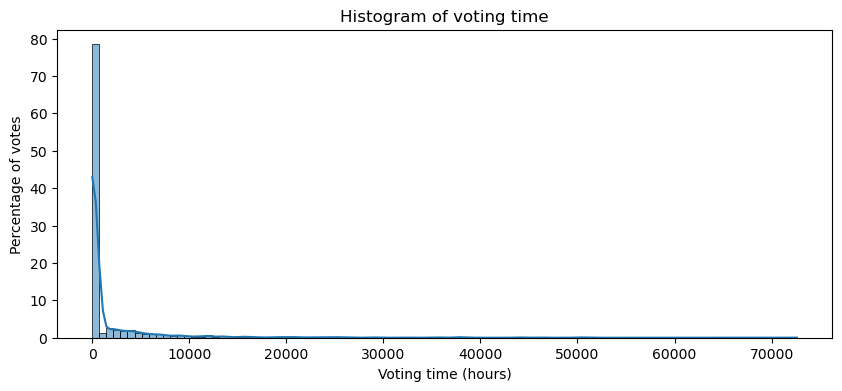

In [10]:
# Plot histogram of voting time
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_timeserie, x='Voting_time', kde=True, ax=ax, bins=100, stat='percent')
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

In [11]:
# Remove the vote at time 0 minute, to plot the histogram of voting time
df_plot = df_timeserie[df_timeserie.Voting_time != 0]

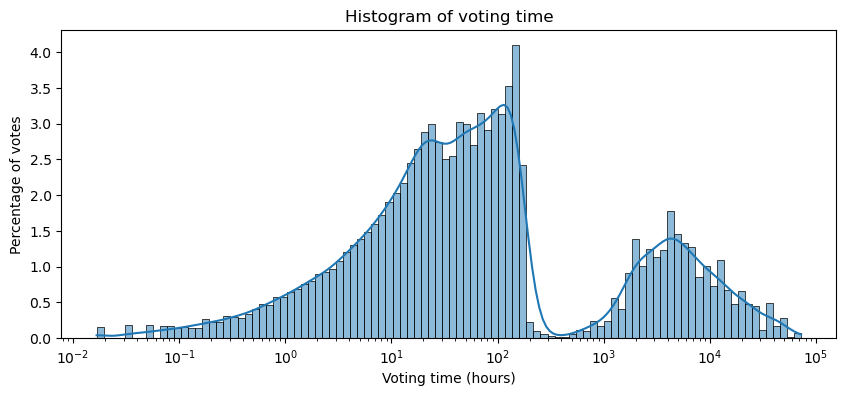

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time',kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

#### Plot distribution in function of time

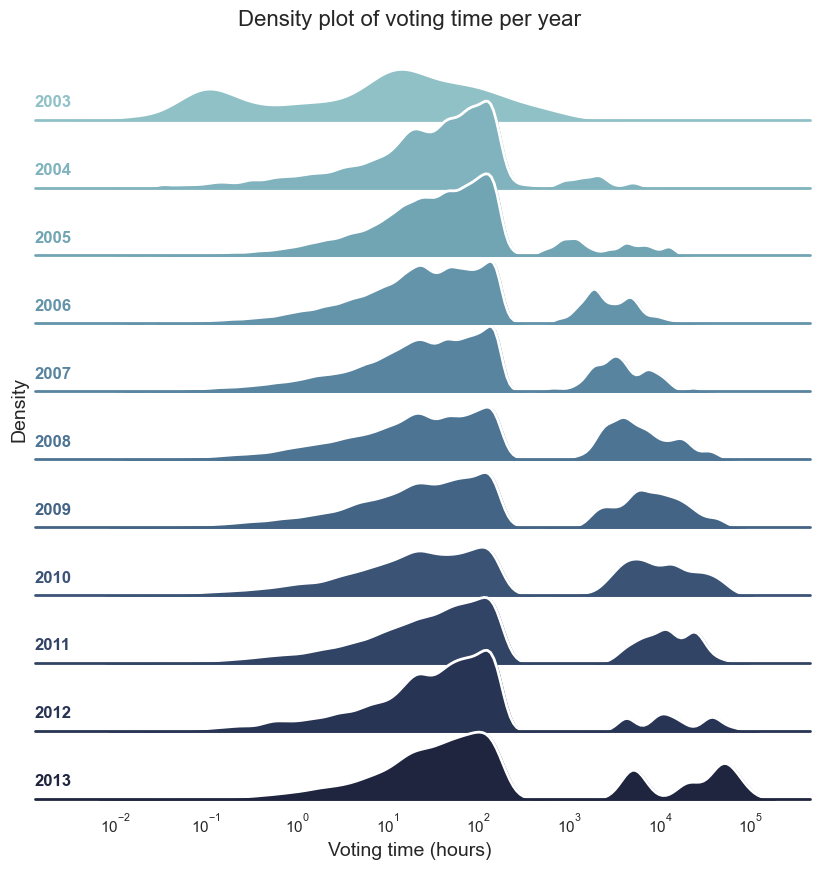

In [13]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)
g = sns.FacetGrid(df_plot, row='Year', hue='Year', aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'Voting_time', bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5, log_scale=(True, False))
g.map(sns.kdeplot, 'Voting_time', clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
      ax = plt.gca()
      ax.text(0, .2, label, fontweight="bold", color=color,
                  ha="left", va="center", transform=ax.transAxes)

g.map(label, 'Voting_time')

# Set figure properties
#g.fig.set_tight_layout(True)
g.fig.subplots_adjust(hspace=-.25)
g.fig.set_figwidth(10)
g.fig.set_figheight(10)
g.fig.suptitle('Density plot of voting time per year', fontsize=16, y=0.9)
g.fig.supylabel('Density', fontsize=14, x=0.1)
g.fig.supxlabel('Voting time (hours)', fontsize=14, y=0.05)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)

plt.show()
sns.set_theme()

We can first notice that in 2003 the voting time distribution was quite different from the other years. Indeed, the voting times were much more spread out and shifted to the left. This is probably due to the fact that at the creation of election system, the rules were not yet well established so the behaviour of the voters was not very consistent. We will start by checking if the 2003 data represents a significant part of the data. 

In [14]:
portion_2003 = df[df['Year'] == 2003].shape[0] / df.shape[0]
print(f'Portion of 2003 data: {portion_2003:.2%}')

Portion of 2003 data: 0.10%


Knowing that the amount of data for 2003 represents only 0.1% of the total data, we can consider that these data are negligible and we can remove them from the dataset. 

In [15]:
df = df[df['Year'] != 2003]
#df.to_csv('wiki-RfA.csv')

df_timeserie = df_timeserie[df_timeserie['Year'] != 2003]
# Update the voting time of the df_timeserie dataframe
voting_time = (df_timeserie.groupby('Target').Date.apply(lambda x: x - x.min()).dt.total_seconds()/3600).rename('Voting_time')
df_timeserie = df_timeserie.drop(columns=['Voting_time']).join(voting_time.droplevel(0))

df_plot = df_timeserie[df_timeserie.Voting_time != 0]

## Time interval between votes

The bimodal distribution we get when plotting on a log scale was unexpected, thus and to find an explanation to this phenomenon, we can look at the distribution of time intervals between votes:

In [16]:
# Separate the vote for a candidate by elections rounds (i.e. when there is no new vote for a target during 72 hours)
votes_gap = df_timeserie.groupby('Target').Voting_time.apply(lambda x: x.sort_values().diff())
votes_gap.describe()

count    184438.000000
mean         20.277718
std         515.317045
min           0.000000
25%           0.216667
50%           0.716667
75%           2.233333
max       72247.600000
Name: Voting_time, dtype: float64

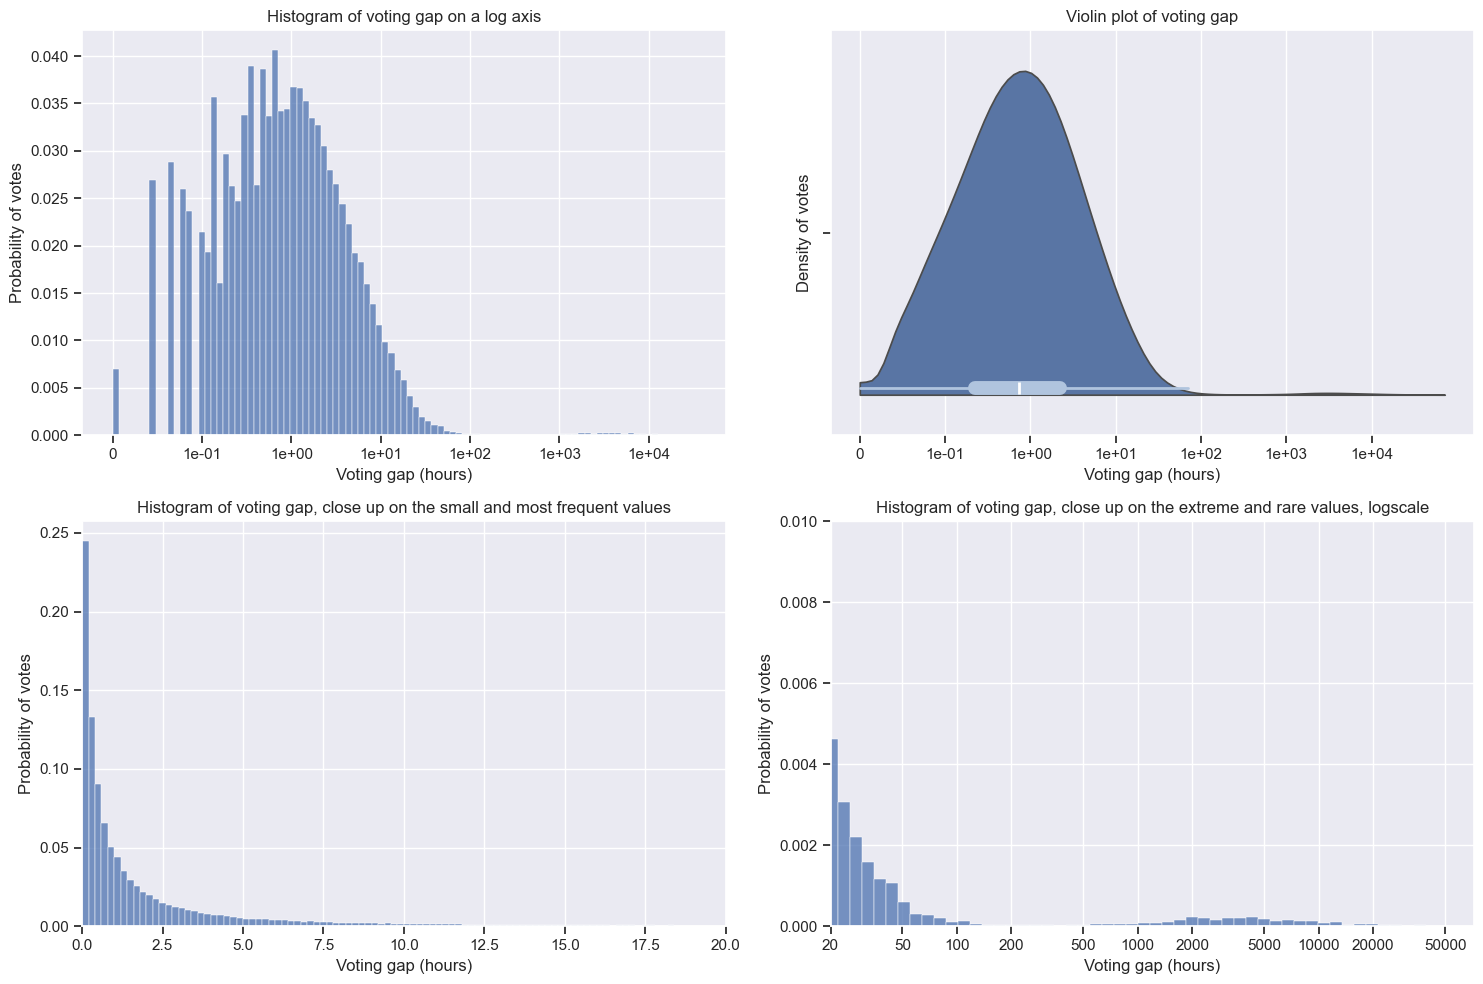

In [17]:
# Plot histogram of voting gap
fig, ax = plt.subplots(2,2, figsize=(15,10), tight_layout=True)

log_shift = 0.01
votes_gap_plot = votes_gap.dropna() + log_shift

sns.histplot(data=votes_gap_plot, ax=ax[0,0], stat='probability', bins=100, log_scale=(True, False))
ax[0,0].set_title('Histogram of voting gap on a log axis')
ax[0,0].set_xlabel('Voting gap (hours)')
ax[0,0].set_ylabel('Probability of votes')
ax[0,0].tick_params(bottom=True, left=True)
ax[0,0].set_xlim(0, np.max(votes_gap))
ticks = np.power(10, np.arange(np.log10(log_shift), np.ceil(np.log10(np.max(votes_gap_plot))), 1))
labels = [f'{tick:.0e}' for tick in ticks]
labels[0] = '0'
ax[0,0].set_xticks(ticks, labels=labels)

# Violin plot of voting gap
sns.violinplot(data=votes_gap_plot, ax=ax[0,1], orient='h', bw=0.2, cut=0, log_scale=(True, False), split=True, inner_kws=dict(box_width=10, whis_width=2, color="lightsteelblue"))
ax[0,1].set_title('Violin plot of voting gap')
ax[0,1].set_xlabel('Voting gap (hours)')
ax[0,1].set_ylabel('Density of votes')
ax[0,1].tick_params(bottom=True, left=True)
ax[0,1].set_xticks(ticks, labels=labels)

sns.histplot(data=votes_gap, ax=ax[1,0], stat='probability', bins=100, binrange=(0,20))
ax[1,0].set_title('Histogram of voting gap, close up on the small and most frequent values')
ax[1,0].set_xlabel('Voting gap (hours)')
ax[1,0].set_ylabel('Probability of votes')
ax[1,0].set_xlim(0, 20)
ax[1,0].tick_params(bottom=True, left=True)


sns.histplot(data=votes_gap, ax=ax[1,1], stat='probability', bins=100, log_scale=(True, False))
ax[1,1].set_title('Histogram of voting gap, close up on the extreme and rare values, logscale')
ax[1,1].set_xlabel('Voting gap (hours)')
ax[1,1].set_ylabel('Probability of votes')
ax[1,1].set_xlim(20, np.max(votes_gap))
ax[1,1].set_ylim(0, 0.01)
ax[1,1].set_xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000], labels=['20', '50', '100', '200', '500', '1000', '2000', '5000', '10000', '20000', '50000']) 
ax[1,1].tick_params(bottom=True, left=True)

plt.show()

In [18]:
# Extract the voting gap correspong to less than 1% of the voting gap
votes_gap[votes_gap >= votes_gap.quantile(0.99)].min()

26.900000000000006

We can see that the distribution of the time interval between votes almost follows an exponential distribution (which is what we would expect for this type of data). However, we can see that there is an additional very small peak between 1000 and 20000 hours, which reveals the presence of multiple batches/aggregate of votes separated by a long period of time. We interpret this as different rounds of elections. Indeed, some target are not elected at the first try and they run for admin again after a certain period of time. We now want to separate the data into different rounds of elections for each target.

### Separate data into rounds of elections

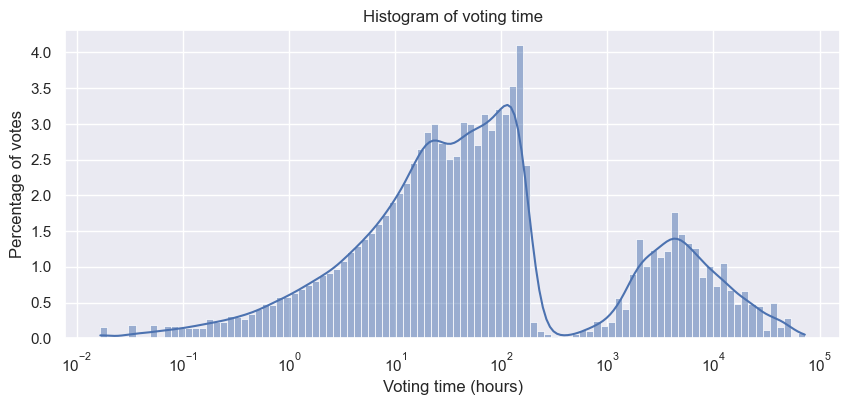

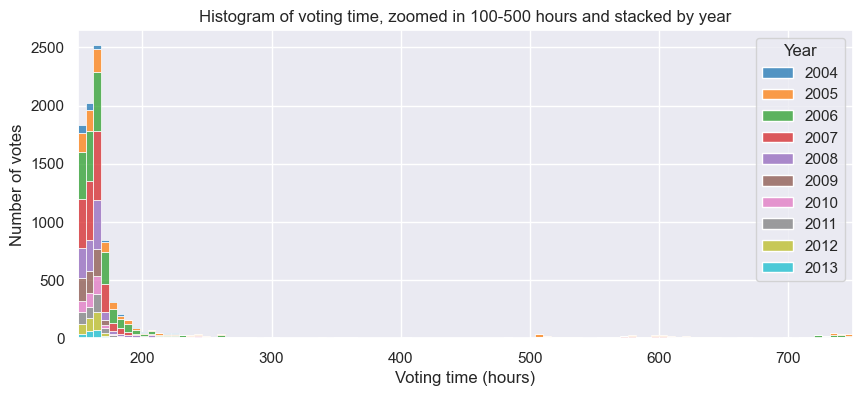

After this threshold in hours, we consider that the incoming votes are part of a new election: 391.11 hours
Percentage of votes happening at this threshold: 0.041%


In [19]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time', kde=True, ax=ax, bins=100, stat='percent', log_scale=(True, False))
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

# Close up the voting time to 100-500 hours
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df_plot, x='Voting_time', ax=ax, bins=100, stat='count', log_scale=(False, False), binrange=(150, 750), hue='Year', palette='tab10', multiple='stack')
ax.set_title('Histogram of voting time, zoomed in 100-500 hours and stacked by year')
ax.set_xlabel('Voting time (hours)')
ax.set_ylabel('Number of votes')
ax.set_xlim(150, 750)
plt.show()

# Fin the local minima
kde = kde.get_lines()[0].get_data()
deriv_kde_sign = np.sign(np.diff(kde[1]))
local_mins = kde[0][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]
y_mins = kde[1][np.append((np.roll(deriv_kde_sign, 1) - deriv_kde_sign) != 0, False)]

# only keep the minima with a y value < 0.1 and a x value is between 10 and 1e4
round_threshold = local_mins[(y_mins < 0.1) & (local_mins > 10) & (local_mins < 1e3)][0]
percent_at_threshold = y_mins[(y_mins < 0.1) & (local_mins > 10) & (local_mins < 1e3)][0]

print(f'After this threshold in hours, we consider that the incoming votes are part of a new election: {round_threshold:.2f} hours')
print(f'Percentage of votes happening at this threshold: {percent_at_threshold:.2}%')

To separate the different rounds of elections we focus on the gap between the 2 peaks in the distribution of voting time. First, we can observe that there is a huge drop in the amount of votes at around 170h which is consistent with the information we found on the Wikipedia page about the election duration being approximately 7 days (noting that this period can be prolonged in some cases). 
To find the best threshold to separate the data, we extracted the kernel density estimation of the distribution of voting time and we computed its local minimum in the gap between the 2 peaks and the corresponding voting time. We found that the best threshold to separate the data is 391h. We can now separate the data into different rounds of elections for each target using this threshold.

In [24]:
# Start a new round each time the interval between the current voting and the first voting time of the round is greater than the round threshold
def compute_rounds(data, round_threshold):
    data = data.sort_values('Voting_time')
    voting_time = data.Voting_time.values
    rounds = np.array([1])
    for i in range(1,len(voting_time)):
        # If the candidate is elected, we stop the round but check if there is no other vote after more than 4 month (what we consider as a new election for a candidate that may have lost its admin rights)
        if data.Results.values[i] == 1 and voting_time.max()-voting_time[i] < 24*30*4:
            round_number = rounds[-1] + (voting_time[i] > round_threshold)
            rounds = np.append(rounds, round_number*np.ones(len(voting_time)-i).astype(int))
            break
        elif (voting_time[i] > round_threshold and data.Results.values[i] != 1 and voting_time[i]-voting_time[i-1]>=24) or \
            (data.Results.values[i] == 1 and (voting_time[i] > 24*30*4 or data.Results.values[i-1] != 1)):
            rounds = np.append(rounds, rounds[-1] + 1)
            voting_time = voting_time - voting_time[i]
        elif len(rounds) > 1 and rounds[-2] != rounds[-1]:
            display(data.iloc[i-1:i])
            rounds = np.append(rounds, rounds[-1])
            voting_time = voting_time - voting_time[i]
        else:
            rounds = np.append(rounds, rounds[-1])
            
    rounds = pd.Series(rounds, index=data.index).astype(int)
    return rounds

rounds = (df_timeserie.groupby('Target').apply(lambda x: compute_rounds(x, round_threshold))).rename('Round')
df_timeserie2 = df_timeserie.join(rounds.droplevel(0))
df_timeserie2

,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
152971,Naconkantari,9cds,-1,-1,2006,2006-06-08 23:22:00,"'''Oppose''', [http://en.wikipedia.org/w/index...",4087.283333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
153000,BD2412,A Link to the Past,1,-1,2006,2006-04-02 06:05:00,'''Support''' - [[first post]] (even while on ...,4273.233333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
71285,Dihydrogen Monoxide,ACBest,-1,-1,2008,2008-02-06 10:57:00,The nom only adds to my maturity concerns. '',4625.233333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
71216,Sarsaparilla,Abd,1,-1,2008,2008-02-10 04:08:00,The fact that he was tempted to decline is pri...,2937.583333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
153242,NSLE,Adam1213,-1,-1,2006,2006-01-24 03:18:00,"Sorry, I do not conider this user to be famili...",2445.2


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
27420,Graeme Bartlett,Addihockey10,-1,-1,2010,2010-05-31 06:15:00,User has not opted in to the edit counter stat...,5860.933333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
27435,Tofutwitch11,Addihockey10,-1,-1,2010,2010-10-25 19:20:00,"'''Oppose''': Fairly new, it seems you go on a...",9402.016667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
71571,Malinaccier,Aitias,1,-1,2008,2008-05-16 21:37:00,'''Support'''. Seen you around and I believe ...,2492.166667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
27577,Master&Expert,Alan16,1,-1,2010,2010-01-03 05:19:00,I've looked through his contributions and I ha...,3603.65


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
153646,Tawker,Alphax,1,-1,2006,2006-03-08 06:07:00,I see no problems --,3398.283333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
111309,mikkalai,Amarkov,-1,-1,2007,2007-11-30 01:46:00,Cannot help but have an impression that wikipe...,7030.166667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
44801,Pedro,Andrewmc123,1,-1,2009,2009-07-06 12:39:00,"Okay, I think a support here, but I have a hor...",2873.966667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
15978,28bytes,Ankitbhatt,-1,-1,2011,2011-10-18 18:42:00,"Sorry, but I do not see enough experience in t...",13448.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
111338,Mike 7,Anthony5429,-1,-1,2007,2007-03-22 19:41:00,'''Oppose''' - Fewer than five hundred edits s...,4572.566667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
7130,Scottywong,Apteva,-1,-1,2012,2012-11-30 06:23:00,'''Oppose''' - Concerns about both insufficien...,29793.2


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
187112,Redwolf24,Aranda56,1,-1,2005,2005-11-02 03:03:00,"[[User:Redwolf24|<font color=""darkblue"">R</fon...",597.133333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
187148,Karmafist,Aranda56,1,-1,2005,2005-12-01 22:59:00,'''Obligatory Nominator Support''',1313.066667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
154365,WikiFanatic,Aranda56,1,-1,2006,2006-01-03 23:05:00,Obviously.,2105.166667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
154389,Drini,Aranda56,1,-1,2006,2006-02-04 05:13:00,'''support''' -- <small> (,2855.3


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
27763,Phantomsteve,ArcAngel,-1,-1,2010,2010-07-08 21:24:00,"'''Oppose''' with a bit of regret. I am sorry,...",7145.316667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
44914,Wisdom89,AresAndEnyo,-1,-1,2009,2009-02-20 18:31:00,"'''Oppose''' - Yes, firstly, due to your edit ...",19005.583333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
16027,28bytes,Armbrust,0,-1,2011,2011-05-12 16:47:00,"'''Neutral''' for now. I'd like to support, bu...",5490.433333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
71908,Xenocidic,Asenine,1,-1,2008,2008-10-03 17:04:00,'''Support''' - I had this one watchlisted for...,5188.866667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
72600,Dreamafter,BQZip01,-1,-1,2008,2008-01-27 03:17:00,"'''Oppose''', sorry to be the first to comment...",480.183333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
72634,Mizu onna sango15,BQZip01,1,-1,2008,2008-08-07 02:14:00,Per no negative interactions and no reason to ...,5111.133333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
45498,NuclearWarfare,BQZip01,1,-1,2009,2009-05-07 01:15:00,"It's finally transcluded. Great! Clueful user,...",11662.15


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
111594,Matthew,Badlydrawnjeff,1,-1,2007,2007-04-20 15:00:00,'''Support''' - a fine user. I have every conf...,7220.333333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
154630,CharlotteWebb,Bart133,-1,-1,2006,2006-12-01 15:35:00,"User's last 500 edits look good, except that t...",15731.55


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
45231,Giants27,Basket of Puppies,1,-1,2009,2009-12-06 16:14:00,'''Support''' Dedicated editor who has certain...,1981.466667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
111891,Wikihermit,Betacommand,1,-1,2007,2007-09-06 20:20:00,"'''Support''' as nom. <span style=""font-family...",7841.35


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
155084,Bigtop,Bigtop,1,-1,2006,2006-08-21 19:35:00,<s>'''Support''' as nominator.,1096.966667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
72305,Qst,Billy,-1,-1,2008,2008-03-25 19:50:00,'''Oppose'''. Nothing much has changed since y...,2642.6


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
72313,AdrianTM,Biruitorul,1,-1,2008,2008-03-06 22:42:00,'''Support''' -- Contributor of encyclopedic b...,11163.333333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
45466,Goodmorningworld,Blakegripling ph,-1,-1,2009,2009-07-21 09:34:00,'''Oppose''' Admins must communicate well. A g...,9340.733333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
27931,7,Blanchardb,1,-1,2010,2010-04-14 23:19:00,Without hesitation.,11944.0


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
16103,Strange Passerby,BuickCenturyDriver,-1,-1,2011,2011-04-13 09:21:00,Shows no understanding of need or use of tools...,3725.616667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
112677,Xaosflux,Bushcarrot,0,-1,2007,2007-04-13 01:43:00,'''Neurtal''' Pending answer to new quetion. —,1823.916667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
7337,NHRHS2010,Calabe1992,1,-1,2012,2012-04-25 22:06:00,Nominator support.,4350.066667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
112692,Giggy,Caldorwards4,-1,-1,2007,2007-07-15 03:45:00,Very low project space edit count means we hav...,9719.05


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
112762,Anonymous Dissident,Captain panda,1,-1,2007,2007-11-17 13:02:00,Strongly. Great contributor. -- <strong>,3261.95


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
155749,Jahiegel,Carnildo,1,-1,2006,2006-03-20 21:36:00,I've been waiting for Carnildo to accept and a...,5276.033333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
45777,Juliancolton,Ceranthor,1,-1,2009,2009-06-26 19:38:00,Support as nom. –''',2637.65


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
112928,Grandmasterka,Chacor,1,-1,2007,2007-03-06 05:01:00,Pre-emptive nominator '''support'''.,4049.5


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
113316,Kmccoy,Cobi,1,-1,2007,2007-12-11 05:32:00,'''Support''' as nominator.,1655.333333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
72901,MBisanz,Cobi,1,-1,2008,2008-03-06 03:29:00,'''Support''' Knows his stuff. ''',3717.283333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
113513,QuasyBoy,Cometstyles,1,-1,2007,2007-07-03 12:52:00,'''Support''' Cometstyles is a great vandal fi...,1992.133333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
156482,Tone,Computerjoe,1,-1,2006,2006-05-22 21:07:00,First to '''Support'''. All my interactions wi...,1775.433333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
28197,Wifione,Connormah,1,-1,2010,2010-07-10 03:09:00,'''Support''' Contributions come up to my stan...,3770.216667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
156695,Tijuana Brass,Cookiecaper,0,-1,2006,2006-04-18 10:49:00,"<S>'''Neutral''', for the time being. I've app...",4132.95


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
46070,Capricorn42,Cool3,1,-1,2009,2009-03-28 18:01:00,"'''Support'''— No issues, good content contrib...",24909.116667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
28330,Beeblebrox,Crotalus horridus,-1,-1,2010,2010-03-22 16:56:00,'''oppose''' This looks like a decidedly [[WP:...,36762.133333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
16236,Cirt,Ctjf83,1,-1,2011,2011-01-14 18:40:00,"'''Support''' - Dedicated Wikipedian, and stro...",24733.55


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
16340,Theleftorium,Curtis23,-1,-1,2011,2011-06-18 11:37:00,I'm sorry but you've done way too little editi...,13040.566667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
16347,BuickCenturyDriver,Curtis23,1,-1,2011,2011-07-28 10:06:00,Per experiance. Over two years. Good luck. ...,13999.05


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
73457,Useight,Cyclonenim,1,-1,2008,2008-07-13 15:44:00,'''Support'''. He wants to work with AIV and C...,2084.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
46215,Dylan620,Cyclonenim,1,-1,2009,2009-04-11 11:47:00,'''<redacted by PeterSymonds> yes!''' I've bee...,8608.95


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
73521,Royalbroil,D-Day,1,-1,2008,2008-03-04 21:27:00,'''Support''' as nominator.,17996.466667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
46288,Bradjamesbrown,Dalekusa,-1,-1,2009,2009-12-23 21:43:00,"'''Oppose''' I'm sorry, but you're still nowh...",18124.683333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
73580,Ironholds,Danielfolsom,-1,-1,2008,2008-08-30 21:30:00,'''Weak Oppose''' for now. A month of edits do...,7844.15


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
114002,Chrislk02,Davnel03,1,-1,2007,2007-08-17 14:18:00,'''Weak support''' - Been here for almost a ye...,3837.766667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
73652,Rudget,Davnel03,1,-1,2008,2008-07-10 19:04:00,"Excellent assistance at SSP, good calls at AIV...",11714.533333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
73708,Wisdom89,Dendodge,-1,-1,2008,2008-03-03 22:39:00,'''Oppose''' - Regretfully - Well intentioned ...,553.883333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
73716,Master&Expert,Dendodge,1,-1,2008,2008-12-07 11:52:00,"From what I've seen, he looks like a great can...",7239.1


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
46298,Pmlinediter,Dendodge,1,-1,2009,2009-08-31 16:33:00,I know people might raise their eyebrows if th...,13651.783333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
157505,Kungming2,Deon555,1,-1,2006,2006-10-26 03:23:00,'''Support''' A fine editor of Wikipedia - fri...,2447.45


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
114159,Raystorm,Dev920,1,-1,2007,2007-07-29 12:30:00,"'''Support''' -Naturally, as nom. Will make a ...",4587.6


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
73849,Rudget,Dihydrogen Monoxide,1,-1,2008,2007-12-28 10:40:00,"Yes, Yes, and Yes.",2335.05


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
158048,JoshuaZ,Drumguy8800,-1,-1,2006,2006-04-28 03:15:00,"Sorry to be your first vote, but I need to opp...",1585.233333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
16482,Townlake,Dusti,-1,-1,2011,2011-03-16 05:34:00,Given that your previous RFA failed largely fo...,8430.85


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
16634,N5iln,Dylan620,0,-1,2011,2011-04-18 15:37:00,'''Neutral''' <s>pending further stats/contrib...,11827.733333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
74204,Strikeout Sister,Ecoleetage,1,-1,2008,2008-09-01 01:42:00,'''Support''' - Hello? I'm definitely in the r...,5120.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
28621,Malleus Fatuorum,Editorofthewiki,-1,-1,2010,2010-08-04 02:01:00,"This is a joke, right?",16200.283333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
114902,Ned Scott,Elonka,-1,-1,2007,2007-07-24 05:30:00,'''Strong oppose'''. Elonka is a highly manipu...,6704.716667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
158429,Jaranda,Encyclopedist,-1,-1,2006,2006-07-07 19:25:00,'''Speedy close''' too soon,2803.45


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
158438,Friday,Encyclopedist,-1,-1,2006,2006-07-31 17:26:00,"Sadly, I must oppose. I don't doubt good inte...",3377.466667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
46548,Realist2,Enigmaman,1,-1,2009,2009-01-06 02:45:00,<s>'''Easy decision'''</s> '''Weak Support''' —,5340.883333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
158530,Tariqabjotu,Everyking,-1,-1,2006,2006-09-10 04:16:00,'''Strong Oppose''' Your defense of the situat...,20621.5


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
115159,MatthewFenton,Everyking,1,-1,2007,2007-02-07 13:11:00,'''Support''' — naturally as nominator. <span ...,24230.416667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
74837,Durova,Everyking,1,-1,2008,2008-08-25 19:24:00,"'''Support''' as conominator. <font face=""Verd...",37796.633333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
46756,xeno,Everyking,1,-1,2009,2009-05-08 15:09:00,"Yep. –<font face=""verdana"" color=""black"">",43936.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
75126,Tanthalas39,EvilWendyMan,-1,-1,2008,2008-10-04 15:50:00,This is A Bad Idea. You obviously mean well an...,506.883333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
115430,MatthewFenton,Firefoxman,-1,-1,2007,2007-02-09 23:18:00,'''Oppose''' — I'm sorry but I'm not actually ...,10079.7


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
7627,Rschen7754,Floydian,1,-1,2012,2012-08-15 18:18:00,As nom. --''',11245.216667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
75266,Wisdom89,Footballfan190,-1,-1,2008,2008-03-19 06:49:00,"'''Oppose''' - Sorry, but I feel that this RfA...",1946.0


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
75274,Wisdom89,Footballfan190,-1,-1,2008,2008-08-04 07:26:00,'''Oppose''' - Way too soon since last RfA. I ...,5258.616667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
28741,Wisdom89,Frozen4322,-1,-1,2010,2010-02-13 05:34:00,"'''Oppose''' - I don't see much, if any, chang...",6084.216667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
7837,Tikiwont,GSorby,-1,-1,2012,2012-02-05 23:44:00,Going through 2012 edits I actually see few AI...,5022.883333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
47159,Jusdafax,Gaelen S.,-1,-1,2009,2009-09-26 07:36:00,'''Oppose''' Let me say that while I admire yo...,742.7


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
75462,Camaeron,Geni,-1,-1,2008,2008-03-16 16:10:00,'''Oppose''' - Narrow-minded as it may sound: ...,28492.966667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
75633,DarkFalls,Geni,0,-1,2008,2008-08-21 11:15:00,I probably won't change to either support or o...,32280.05


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
159326,DarthVader,Geo.plrd,0,-1,2006,2006-08-23 23:57:00,'''Neutral'''. With less than 50 mainspace edi...,2187.2


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
28753,Jac16888,Geomapboy2,-1,-1,2010,2010-03-02 09:06:00,"'''Oppose''', your nomination statement is mor...",31899.45


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
159547,Computerjoe,Getcrunk,0,-1,2006,2006-06-25 18:32:00,A little too close since your last one. Sorry.,1174.883333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
47247,Balloonman,Giangian15,0,-1,2009,2009-08-27 05:58:00,I refuse to oppose RfA's that are certain to f...,11430.883333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
188365,Variable,Gkhan,-1,-1,2005,2005-08-15 23:15:00,'''Oppose'''. Only 367 edits to article namesp...,2828.016667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
28795,Fetchcomms,Gobbleswoggler,-1,-1,2010,2010-03-07 19:57:00,'''Oppose''' per [[WP:NOTNOW]]. You don't need...,577.783333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
28799,SluggoOne,Gobbleswoggler,-1,-1,2010,2010-06-04 17:23:00,"'''Strong Oppose''', support immediate close p...",2711.216667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
115885,Marlith,Goodshoped35110s,1,-1,2007,2007-11-21 06:05:00,"'''Support''' I see no reason to oppose, a hea...",911.233333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
47350,Ktr101,Gordonrox24,1,-1,2009,2009-08-02 02:11:00,'''Support''' You seem to be knowning what you...,1661.183333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
196975,UninvitedCompany,Guanaco,1,-1,2004,2004-12-03 14:29:00,NaN,5006.35


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
188389,Shanes,Guanaco,1,-1,2005,2005-03-08 23:02:00,NaN,7294.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
188454,Jfdwolff,Guanaco,1,-1,2005,2005-11-12 21:04:00,'''S'''upport warmly. Have previously been imp...,13268.933333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
16983,Σ,Guoguo12,1,-1,2011,2011-06-19 22:45:00,"'''Support''' - It's time. --<span style=""text...",4270.283333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
116244,Pedro,Gurch,1,-1,2007,2007-11-01 10:05:00,'''Support''' this deeply experienced former a...,12337.65


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
22270,Acps110,HJ Mitchell,1,1,2010,2010-04-23 20:53:00,"'''Beat-the-nom-support''' - Excellent, calm a...",2855.416667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
159709,Rory096,Haham hanuka,-1,-1,2006,2006-06-02 07:38:00,'''Oppose'''. [http://en.wikipedia.org/w/index...,10862.666667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
3028,Status,Hahc21,1,-1,2013,2013-02-10 23:44:00,"'''Support'''. <tt><font style=""text-shadow:#B...",5232.916667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
47574,Juliancolton,HappyCat12,-1,-1,2009,2009-01-13 00:11:00,Suggest [[WP:SNOW]] close. &ndash;,3579.783333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
116409,Captain panda,Hdt83,-1,-1,2007,2007-06-19 01:05:00,'''Oppose''' This user's last RfA was less tha...,571.3


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
116438,DeadBot,Hdt83,1,-1,2007,2007-08-03 00:42:00,"'''Support'''. You know what we are about, and...",1650.916667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
116542,Thomas H. Larsen,Hdt83,-1,-1,2007,2007-10-29 04:49:00,'''Weak oppose.''' The lack of comprehensive a...,3743.033333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
76246,Seresin,Headbomb,-1,-1,2008,2008-07-08 21:08:00,[https://secure.wikimedia.org/wikipedia/en/w/i...,405.85


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
47598,Kingpin13,Headbomb,1,-1,2009,2009-08-07 19:36:00,'''Support''' good user. Trust them. And never...,9884.316667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
159849,evrik,Hello32020,0,-1,2006,2006-11-17 23:00:00,'''Neutral''' Don't know this user from experi...,1831.433333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
28938,Milowent,Herostratus,1,-1,2010,2010-06-23 15:31:00,'''Support''' Per the nomination requesting th...,35299.133333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
116608,KTC,Hersfold,1,-1,2007,2007-08-29 02:09:00,'''Strong support''' as co-nom.,2016.533333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
116658,Chacor,Hex,1,-1,2007,2007-03-27 15:03:00,I trust that Hex's problems with incivility si...,3960.433333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
160071,Celestianpower,HighwayCello,1,-1,2006,2006-07-27 21:58:00,May I offer the first !vote to this fine user....,1943.133333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
160126,Natalya,HighwayCello,1,-1,2006,2006-11-02 23:02:00,"'''Strong support''', not much else to say aft...",4296.2


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
76294,Phoenix-wiki,HisSpaceResearch,1,-1,2008,2008-01-03 13:28:00,As nom--,1267.45


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
160239,Sceptre,HolyRomanEmperor,1,-1,2006,2006-07-01 14:18:00,'''Nominator's support''' ''',4629.633333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
188889,Denelson83,Howabout1,-1,-1,2005,2005-07-18 06:13:00,"'''Oppose.''' I apologize, but with an edit c...",1179.183333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
116868,Nat,HyperSonicBoom,-1,-1,2007,2007-10-12 19:25:00,"'''Oppose''' Sorry, but I cannot support someo...",5801.566667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
47835,Jake Wartenberg,IMatthew,1,-1,2009,2009-02-16 17:02:00,'''Support''' &mdash;,3424.7


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
47908,Theleftorium,IMatthew,1,-1,2009,2009-09-19 12:03:00,iMatthew has been very friendly towards me and...,8579.716667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
76453,Iridescent,Ilyushka88,-1,-1,2008,2008-05-20 21:28:00,<s>Provisional</s> '''Oppose'''. On randomly c...,4948.133333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
29096,Hi878,Immunize,1,-1,2010,2010-06-09 23:01:00,"Cool! First time I've been first! But really, ...",1298.816667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
48016,King of Hearts,ImperatorExercitus,1,-1,2009,2009-09-06 23:32:00,As nom. [[User:King of Hearts|King of]],3440.866667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
76647,Ecoleetage,Ironholds,1,-1,2008,2008-10-11 00:37:00,'''Strong Support''' As nominator. Ironholds i...,2959.35


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
48096,ImperatorExercitus,Ironholds,1,-1,2009,2009-03-15 15:35:00,'''Strong (and First) Support''' Cheers. ''''',6694.316667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
29139,NuclearWarfare,Ironholds,1,-1,2010,2010-01-01 04:12:00,'''Strong support''' as nominator. <font color...,13690.933333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
117083,Mms,IslaamMaged126,-1,-1,2007,2007-12-15 23:59:00,'''Oppose''' as 10 years old should not be an ...,849.166667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
76819,Wisdom89,Izzy007,-1,-1,2008,2008-05-25 20:37:00,'''Weak Oppose''' - You've done some good thin...,2105.866667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
76911,Kurykh,Jamesontai,1,-1,2008,2008-09-14 05:37:00,"'''Nominator support''' —'''<font face=""Comic ...",5698.033333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
29332,WereSpielChequers,Jeffrey Mall,1,-1,2010,2010-06-06 14:21:00,As nominator. '',4906.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
29392,Inka 888,Jerem43,1,-1,2010,2010-12-02 23:50:00,'''Support''' Seems fine to me. I very impress...,12084.45


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
77199,PeterSymonds,Jet,-1,-1,2008,2008-05-24 19:03:00,"'''Oppose''' Sorry to be the first, but you ha...",2292.716667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
188935,Jessica Liao,Jobe6,1,-1,2005,2005-09-24 03:58:00,'''Support''' He would make a good admin and i...,453.366667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
161270,DS1953,Joturner,1,-1,2006,2006-05-17 04:22:00,'''Support''' again. Still see no reason to t...,1315.7


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
161483,Kimchi.sg,Jtkiefer,1,-1,2006,2006-08-11 09:01:00,'''Strong support''' per nom.,8480.466667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
77369,Euryalus,Juggernaut0102,-1,-1,2008,2008-02-11 09:35:00,'''Oppose''' - edit counts are not always impo...,2281.183333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
77376,giggy,Juggernaut0102,-1,-1,2008,2008-06-08 08:54:00,You've barely edited since your last RfA. Plea...,5112.5


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
77379,SynergeticMaggot,Juliancolton,1,-1,2008,2008-05-07 19:58:00,'''Support''' as co nom. Beat the other nom su...,3239.65


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
77398,Tutthoth-Ankhre,Jupiter Optimus Maximus,1,-1,2008,2008-10-05 19:33:00,'''Strong Support''' I was the one who suggest...,4009.266667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
17166,Kiefer.Wolfowitz,Jéské Couriano,0,-1,2011,2011-08-24 10:35:00,"'''Neutral'''<s>, leaning support</s>. The can...",33938.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
162135,Xaosflux,KI,0,-1,2006,2006-04-10 03:42:00,'''Neutral''' Pending followup questions below. —,1181.166667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
161591,BradBeattie,Kafziel,1,-1,2006,2006-11-20 14:34:00,'''Support'''. Strong answers to the question ...,3949.6


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
189015,BD2412,Kappa,1,-1,2005,2005-09-29 21:20:00,'''Strong support''' - one of our most dedicat...,2891.983333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
161693,Aaron,Karmafist,1,-1,2006,2006-02-24 01:57:00,'''Strongest possible support''' per NSLE. --,3408.783333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
29686,Pedro,Kirachinmoku,-1,-1,2010,2010-03-17 22:45:00,"'''Oppose''' No, sorry. Sporadic editing, with...",11614.966667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
48957,NuclearWarfare,Ktr101,-1,-1,2009,2009-07-30 01:49:00,"Sorry, but just actions and posts in general t...",9223.066667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
29723,Rlevse,Ktr101,1,-1,2010,2010-05-31 22:03:00,Strong support as nom. And of course recuse fr...,16563.3


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
8017,Keegan,Ktr101,1,-1,2012,2012-12-22 08:21:00,Per nom and answers to questions.,39013.6


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
8086,Dank,Kumioko,1,-1,2012,2012-08-09 02:12:00,"He's right ... he's had a huge impact, and tha...",37851.216667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
48987,Download,Kww,1,-1,2009,2009-04-05 22:37:00,'''Support''' Deserves the tools. <font face=...,4457.333333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
49121,Wehwalt,Kww,1,-1,2009,2009-10-09 08:05:00,As nom.--,8930.8


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
77894,giggy,Lady Aleena,1,-1,2008,2008-07-05 07:28:00,Per Giggy's excellent nomination. —''',1761.783333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
49342,Pedro,Leonard^Bloom,0,-1,2009,2009-07-02 07:14:00,"Leaning to support. I like a lot of it, but I ...",8450.866667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
189176,Josh Cherry,Lst27,-1,-1,2005,2005-03-30 04:44:00,This user first claimed in no uncertain terms ...,4710.533333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
189196,smoddy,Luigi30,1,-1,2005,2005-09-03 21:16:00,"Me, of course.",4205.916667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
30096,Pilif12p,MC10,1,-1,2010,2010-07-27 15:42:00,"'''Support''' Looks alright to me, see no reas...",4717.266667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
119113,Nlu,MER-C,1,-1,2007,2007-02-03 11:31:00,"'''Support''', obviously, as nominator, for re...",2568.2


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
78851,Jersey Devil,MONGO,1,-1,2008,2008-01-19 07:41:00,'''Support''' Proud to be the first to support...,19142.016667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
8826,Jc37,MONGO,0,-1,2012,2012-11-20 23:31:00,"Want to lean towards supporting, but then I re...",61565.85


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
50106,Deacon of Pndapetzim,MZMcBride,1,-1,2009,2009-04-08 06:09:00,'''Strong Support''' The guy's one of the most...,16873.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
39716,Jac16888,MZMcBride,1,1,2009,2009-08-27 18:43:00,'''Support''' Its about time. MZMcBride's data...,20270.466667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
30329,Prodego,MZMcBride,-1,-1,2010,2010-08-24 06:56:00,Learned my lesson after supporting the last one.,28946.683333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
17393,Baseball Watcher,MacMed,-1,-1,2011,2011-03-24 01:39:00,'''Oppose''' Per experience since you only hav...,13827.766667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
49549,Synergy,Majorly,1,-1,2009,2009-05-26 22:50:00,"Good luck. You were a good admin, and time off...",13678.216667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
78245,EJF,Malleus Fatuarum,1,-1,2008,2008-05-18 19:47:00,"Beat the noms! To expand somewhat, Malleus' ar...",4199.866667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
162994,Fabricationary,Maltesedog,0,-1,2006,2006-07-30 19:31:00,I'm voting '''neutral''' at the moment. You s...,5571.2


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
49743,X!,Manadude2,-1,-1,2009,2009-05-10 20:23:00,While I appreciate that you've been here for o...,7786.966667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
118726,Jitse Niesen,MarSch,1,-1,2007,2007-09-13 13:07:00,I have seen this editor's work over a period o...,20491.116667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
8527,Axl,Marcus Qwertyus,-1,-1,2012,2012-06-17 18:15:00,'''Oppose'''. CSD tagging is poor. A high prop...,16772.233333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
197337,Acegikmo1,Marine 69-71,1,-1,2004,2004-10-26 21:18:00,NaN,2830.633333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
163026,Guinnog,Markovich292,-1,-1,2006,2006-10-17 03:41:00,'''Oppose'''. There don't seem to be that many...,933.216667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
163318,Mathwiz2020,Matt Yeager,1,-1,2006,2006-04-08 23:09:00,'''Support''' as the nominator and first voter...,1656.05


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
163397,Chacor,MatthewFenton,-1,-1,2006,2006-09-17 09:13:00,Per [[Wikipedia:Articles for deletion/Angela B...,2007.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
118796,Majorly,MatthewFenton,1,-1,2007,2007-01-09 00:40:00,'''Support''' as per my nomination =) --,4734.833333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
118924,Black Harry,Max Naylor,-1,-1,2007,2007-06-13 20:35:00,'''Oppose''' your last RfA ended on May 1 of t...,1203.416667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
163540,Aranda56,Mb1000,-1,-1,2006,2006-01-29 01:58:00,<s>'''Oppose'''</s> less than 100 wikipedia ed...,3120.733333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
163681,Tony Sidaway,MegamanZero,1,-1,2006,2006-02-10 19:37:00,NaN,1603.55


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
119098,Politics rule,Member,0,-1,2007,2007-09-03 04:11:00,'''Netural''' I am netural for now. His edit c...,1506.25


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
164009,RyanGerbil10,Mike1,1,-1,2006,2006-11-08 06:36:00,'''Strong Support.''' As nominator. [[User:Rya...,772.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
78641,Al tally,Milk's Favorite Cookie,1,-1,2008,2008-07-21 18:01:00,''',2873.0


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
49971,Beeblebrox,MisterWiki,-1,-1,2009,2009-12-10 20:45:00,"Lacks experience, communication skills, and ma...",15067.2


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
119601,Natl1,MoRsE,1,-1,2007,2007-01-22 22:32:00,'''Support''' per editor who needs admin tools.--,2905.583333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
17501,Wifione,My76Strat,1,-1,2011,2011-08-01 11:20:00,'''Support''' Have seen the editor's work in a...,3494.4


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
8885,Ironholds,My76Strat,-1,-1,2012,2012-06-26 08:20:00,"'''oppose'''; holy Victorian prose, batman! Qu...",11411.4


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
8925,Wehwalt,My76Strat,1,-1,2012,2012-11-27 17:47:00,"'''Support''' Solid editor, and unlikely to ab...",15116.85


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
50082,Camw,Mythdon,-1,-1,2009,2009-03-17 05:36:00,'''Oppose''': I'm sorry but just over a month ...,864.733333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
50092,Bjweeks,Mythdon,-1,-1,2009,2009-07-21 05:29:00,'''Strong oppose''' Editor is under ArbCom edi...,3888.616667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
119903,JetLover,NHRHS2010,1,-1,2007,2007-08-29 02:18:00,"'''Support''', Hey, I'd be a pretty bad nom if...",2496.833333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
119922,SJP,NHRHS2010,1,-1,2007,2007-11-08 01:46:00,Of course! I am the nominator. Good luck.--,4200.3


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
79647,Cameron,Naerii,1,-1,2008,2008-09-07 12:56:00,Per my support last time. --''',3040.483333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
79796,Shapiros10,Natl1,0,-1,2008,2008-08-01 16:33:00,'''Neutral''' Failed to follow self-nom instru...,12880.366667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
119788,MaxSem,Navou,1,-1,2007,2007-04-14 05:30:00,'''Support'''. I feel that concerns from the p...,1345.15


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
197481,172,Neutrality,1,-1,2004,2004-08-15 02:49:00,NaN,886.366667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
119957,.V.,Nima Baghaei,1,-1,2007,2007-04-26 16:47:00,'''Support''': Looks good! No red flags and ad...,2058.25


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
79868,Dlohcierekim,No1lakersfan,1,-1,2008,2008-03-07 03:32:00,NaN,10613.666667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
79938,Swatjester,NonvocalScream,1,-1,2008,2008-07-20 20:07:00,Support- Has the requisite level of trust.,1752.483333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
164498,Mike 7,Northenglish,1,-1,2006,2006-10-11 22:47:00,'''Support''' per nom.,2329.083333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
30509,Wehwalt,Nosleep,1,-1,2010,2010-01-21 01:15:00,"'''Support'''. Supported last time, some thin...",4303.766667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
80115,TenPoundHammer,Obaidz96,-1,-1,2008,2008-03-24 04:15:00,"'''Strong oppose, suggest withdrawal''' I agre...",562.783333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
164997,Rory096,PHDrillSergeant,-1,-1,2006,2006-04-23 01:27:00,'''Strong oppose'''. 216 edits as of the tools...,3845.866667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
164999,MatthewFenton,PHDrillSergeant,1,-1,2006,2006-09-17 20:24:00,'''Support''' - I trust user and believe he wo...,7392.816667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
50673,Bradjamesbrown,Paul2387,-1,-1,2009,2009-12-14 10:44:00,"'''Oppose''' 512 edits, and back at RfA just a...",424.0


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
50676,Ged UK,Paul2387,-1,-1,2009,2009-12-31 14:02:00,"Sorry, still too soon.",835.3


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
164871,Rory096,Pegasus1138,1,-1,2006,2006-04-22 19:00:00,"'''Support''', a good editor, would make a goo...",861.4


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
164891,Joturner,Pegasus1138,1,-1,2006,2006-05-30 03:55:00,'''Support''' despite short time since last no...,1758.316667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
164956,Ikiroid,Pegasus1138,1,-1,2006,2006-07-27 03:33:00,"'''First Support''' Experience, behaves like a...",3149.95


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
3248,Giano,Piotrus,-1,-1,2013,2013-04-23 13:01:00,'''Vehement oppose''' Piotrus has proven that ...,72394.083333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
165171,Radiant!,Pmanderson,1,-1,2006,2006-12-07 10:20:00,Naturally. (,2817.55


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
80424,TenPoundHammer,Pookeo9,-1,-1,2008,2008-12-20 22:04:00,'''Oppose''' per [[WP:NOTNOW]]. User has not s...,7941.35


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
30759,Shirik,PopMusicWillNeverBeLowBrow,-1,-1,2010,2010-04-13 21:51:00,'''[[User:Shirik/RFA|Oppose]]''' I hate to be ...,5970.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
50794,S Marshall,Porchcrop,-1,-1,2009,2009-07-10 09:02:00,According to [http://toolserver.org/~soxred93/...,11881.683333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
50806,Craftyminion,Porchcrop,-1,-1,2009,2009-10-02 04:41:00,'''Oppose''' - You lack maturity and judgment....,13893.333333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
30772,Hi878,Porchcrop,-1,-1,2010,2010-11-08 07:39:00,Not enough experience. Very small percentage o...,23544.3


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
120980,Iridescent,Pupster21,-1,-1,2007,2007-08-31 12:51:00,'''Oppose''' Your comments in the last three A...,2853.833333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
120989,Carlosguitar,Pupster21,-1,-1,2007,2007-10-15 13:50:00,"'''Oppose''', I think you are not ready to be ...",3934.816667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
50958,Pedro,Pyfan,-1,-1,2009,2009-05-01 10:58:00,"I continue to admire your dedication, but I th...",1662.45


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
121126,Newyorkbrad,R,1,-1,2007,2007-09-23 02:50:00,"'''Support''' as nominator, per above.",1943.483333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
80476,Riana,R,1,-1,2008,2008-01-20 23:38:00,Poor timing - but should make a good admin. ~,4820.283333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
80539,Wisdom89,RC-0722,-1,-1,2008,2008-03-08 20:49:00,'''Oppose''' - Lack of experience in Wiki-spac...,1218.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
80833,WBOSITG,RMHED,1,-1,2008,2008-07-14 20:54:00,'''Weak Support''' because of your astonishing...,4004.0


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
17837,Baseball Watcher,RadioFan,1,-1,2011,2011-03-06 23:35:00,'''Support''' Don't see anything wrong with ca...,11170.016667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
30904,ArcAngel,RandomStringOfCharacters,-1,-1,2010,2010-02-02 05:56:00,'''Oppose''' 165 edits in the Wikispace? Sorr...,4126.316667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
80651,WBOSITG,Redmarkviolinist,1,-1,2008,2008-02-15 22:35:00,"'''Support''', would not abuse the tools - but...",2521.133333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
80680,Woody,Redmarkviolinist,-1,-1,2008,2008-11-14 18:40:00,I have serious doubts about your judgment and ...,9069.216667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
17868,Reaper Eternal,Reenem,-1,-1,2011,2011-01-27 04:26:00,'''Oppose''' - You write that you warn vandals...,8806.583333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
31058,Nsk92,Rehman,0,-1,2010,2010-07-17 16:09:00,'''Neutral'''. I'll have to review this nomina...,4321.35


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
17904,Ajraddatz,Rehman,-1,-1,2011,2011-04-07 01:42:00,'''Oppose on the basis that I do not believe y...,10642.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
80754,Alanbly,Rgoodermote,-1,-1,2008,2008-03-19 01:23:00,"'''Oppose''' A prolific vandal fighter (and ""f...",1730.45


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
121485,Chacor,Rhythmnation2004,-1,-1,2007,2007-01-19 01:02:00,No need for adminship. No obvious improvement ...,2958.25


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
31060,Codf1977,Richardcavell,1,-1,2010,2010-10-01 12:08:00,"'''Support''' - Is this really necessary, you ...",38048.25


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
17930,Jorgenev,Richardcavell,1,-1,2011,2011-07-24 16:38:00,'''Support'''. Richardcavell was a valuable ad...,45156.75


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
165924,Bishonen,Robchurch,1,-1,2006,2005-12-28 00:14:00,I can't believe he wasn't already an admin. Oh...,1895.883333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
166032,Lar,Robchurch,1,-1,2006,2006-05-20 03:47:00,"First one's free... '''<font color=""green"">[[U...",5331.433333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
166453,Naconkantari,Rory096,1,-1,2006,2006-10-02 00:36:00,"'''Support''', won't abuse the tools.",3893.466667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
80995,PeterSymonds,RyanLupin,1,-1,2008,2008-06-27 22:44:00,'''Support''' As nom.,5952.566667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
166682,PHDrillSergeant,Ryulong,1,-1,2006,2006-10-30 04:30:00,'''Support''' as nominator. ~,2095.916667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
31263,NSD,S Marshall,1,-1,2010,2010-05-25 13:24:00,'''Beat-the-nom support''' - Good candidate. ~...,8618.116667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
31669,Dweller,SMcCandlish,1,-1,2010,2010-01-20 23:21:00,"Pre-transclusion nominator support, as I'm abo...",25830.8


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
168108,J Di,ST47,1,-1,2006,2006-11-23 16:05:00,'''Support'''; first support on an RfA at last...,1892.616667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
122748,Yuser31415,ST47,1,-1,2007,2007-02-19 23:21:00,'''Nominator support'''. You are a great user ...,4011.883333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
190434,celestianpower,SWD316,1,-1,2005,2005-12-14 19:05:00,"'''Extreme ""Ha! I beat the nominator"" support'...",2773.65


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
168691,Latinus,SWD316,1,-1,2006,2006-01-29 22:49:00,'''Support''' as nominator.,3881.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
121699,Sarah Ewart,Saint-Paddy,-1,-1,2007,2007-01-14 02:29:00,"'''Oppose''' Statement, answers, long periods ...",7907.4


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
31300,Nancy,Sam Blacketer,1,-1,2010,2010-01-03 14:57:00,No hesitation.,23716.016667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
166897,Calton,Sam Spade,-1,-1,2006,2006-02-01 13:54:00,"'''Oppose'''. If this is ""improved"", I would h...",11652.433333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
167045,HighwayCello,Sceptre,1,-1,2006,2006-09-18 17:36:00,"First support, he's a medium! :O [[User:Highwa...",6139.116667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81108,Malleus Fatuarum,Sceptre,-1,-1,2008,2008-03-22 02:13:00,'''No'''. That behaviour was more than unaccep...,19347.733333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81154,Naerii,Scetoaux,1,-1,2008,2008-08-23 03:18:00,''',2260.366667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
167314,Sandstein,Selmo,-1,-1,2006,2006-12-16 09:34:00,'''Weak oppose for now'''. Your recent contrib...,2169.716667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81411,Ryan Postlethwaite,Shoessss,1,-1,2008,2008-06-30 16:17:00,'''Support''' - A great user who has shown exc...,7929.7


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
51782,Peregrine Fisher,Shoessss,1,-1,2009,2009-10-03 02:07:00,"I looked at a bunch of edits by this user, and...",18955.533333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
167371,Werdna648,Simetrical,1,-1,2006,2006-06-28 00:03:00,As nominator.,4751.683333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81475,Wisdom89,SimpsonsFan08,-1,-1,2008,2008-05-27 20:17:00,'''Oppose''' - Way too soon after your sockpup...,791.266667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
167571,Samir (The Scope),Siva1979,1,-1,2006,2006-06-01 14:57:00,'''Support''' He's gained much experience sinc...,1223.233333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
167677,Mr. Lefty,Siva1979,1,-1,2006,2006-08-15 20:45:00,"Looking through the past RfAs, he seems to hav...",3029.033333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
122068,Pedro,Siva1979,1,-1,2007,2007-07-13 07:31:00,First off the blocks!. '''Massive Support''' -...,10983.8


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
122145,SQL,Siva1979,1,-1,2007,2007-10-02 09:32:00,"'''First Support!''' I've seen you around, and...",12929.816667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
31589,Soap,Skater,1,-1,2010,2010-03-29 02:32:00,I've looked at your recent edits and see that ...,4660.233333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81513,Wisdom89,Slgrandson,-1,-1,2008,2008-04-09 18:33:00,'''Weak Oppose''' - You indicate that you wish...,8374.0


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
31653,The Utahraptor,Slon02,-1,-1,2010,2010-08-06 23:16:00,"In my opinion, you need a little more experien...",1632.916667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
18026,Fetchcomms,Slon02,1,-1,2011,2011-03-05 05:25:00,"As nom. <span style=""font-family:Georgia;font-...",6679.066667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
122385,RyanGerbil10,Smcafirst,1,-1,2007,2007-04-06 02:13:00,"'''Support.''' Seems simple. Over 3,000 edits,...",2235.566667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81625,ClueBot Commons,Soxred93,1,-1,2008,2008-03-05 04:22:00,'''Strong Support''' - My first first support ...,1258.033333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
18199,Ajraddatz,Spongefrog,-1,-1,2011,2011-09-28 18:31:00,"'''Not yet''', per the nomination statement.",16902.916667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
18212,ArcAngel,Staffwaterboy,-1,-1,2011,2011-02-13 06:40:00,"'''Oppose''' I'm sorry, but I don't feel comfo...",25811.85


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81692,Wisdom89,StephenHjellum13,-1,-1,2008,2008-04-03 00:24:00,'''Oppose''' - Even though this isn't transclu...,7846.966667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
122848,Daniel,Stormtracker94,-1,-1,2007,2007-10-22 23:53:00,Candidate gives the impression of being immatu...,579.016667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81703,Useight,Stormtracker94,1,-1,2008,2008-01-20 13:15:00,'''Support''' as nominator.,2728.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81747,Kingrock,Stormtracker94,1,-1,2008,2008-04-19 18:13:00,'''Strong Support''' As co-nominater.,4893.35


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
81905,Malinaccier,SynergeticMaggot,1,-1,2008,2008-05-20 23:11:00,'''Support'''. I've seen this user around. C...,15842.8


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
51985,Ryan Postlethwaite,Synergy,1,-1,2009,2009-04-13 22:17:00,'''Support''' as nom. ''',5275.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
52118,HiDrNick,Tango,-1,-1,2009,2009-10-12 02:12:00,"''""If you are not happy with me using the tool...",25545.8


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
18427,Armbrust,Tarheel95,-1,-1,2011,2011-12-08 00:46:00,'''Oppose''' For the following reasons: (1) La...,24047.366667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
123173,L (usurped),Tarret,0,-1,2007,2007-08-14 13:43:00,"'''Neutral''' Firstly, your answers are just i...",8920.266667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
123187,Yuser31415,TeckWiz,1,-1,2007,2007-01-15 02:44:00,"'''Support''', you are a very good editor with...",872.283333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
123219,Newyorkbrad,TeckWiz,1,-1,2007,2007-04-10 21:36:00,As nominator.,2931.15


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
190629,Thryduulf,Tedernst,1,-1,2005,2005-12-01 09:09:00,"[[User:Thryduulf|Thryduulf]] 09:09, 1 December...",840.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
168922,Daniel.Bryant,TehKewl1,1,-1,2006,2006-10-29 07:15:00,"'''Weak-ish Support''', Wikipedia would benefi...",1366.983333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
123482,Giggy,TenPoundHammer,1,-1,2007,2007-07-21 01:11:00,I think you've improved enough since last time...,1462.483333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
123571,L (usurped),TenPoundHammer,-1,-1,2007,2007-08-17 19:10:00,"'''Oppose''' Sorry, I like you man, but waitin...",2128.466667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
82114,Brewcrewer,TenPoundHammer,1,-1,2008,2008-01-01 05:47:00,"'''Support'''. At this point, he makes an over...",5403.083333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
82258,SynergeticMaggot,TenPoundHammer,1,-1,2008,2008-03-19 02:24:00,'''Nom support'''.,7271.7


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
82500,PeterSymonds,TenPoundHammer,1,-1,2008,2008-08-07 22:33:00,'''Support''' both Ten and his otters per [[Nu...,10675.85


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
52255,Synergy,TenPoundHammer,-1,-1,2009,2009-09-02 17:14:00,"No, no, no. I still have major doubts about hi...",20054.533333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
169075,JCarriker,Terence Ong,1,-1,2006,2006-06-06 09:22:00,Terence is a remarkable young man; I believe h...,1989.616667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
123582,Swatjester,The Haunted Angel,1,-1,2007,2007-10-26 22:27:00,"'''Support''', as nom.",8020.366667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
31839,intelati,The High Fin Sperm Whale,1,-1,2010,2010-11-08 17:42:00,"A little bit of this, and a little bit of that...",5753.383333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
31909,NSD,The Thing That Should Not Be,1,-1,2010,2010-10-19 22:28:00,"'''Strong support''' as nom. ~<span style=""bor...",6086.683333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
123667,Dweller,The Transhumanist,1,-1,2007,2007-05-22 18:14:00,"In anticipation of TT's acceptance, I support ...",4162.933333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
123746,Dweller,The Transhumanist,1,-1,2007,2007-12-03 10:48:00,As nom. --,8835.5


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
82743,Mind meal,The Transhumanist,1,-1,2008,2008-02-13 13:15:00,Oppose. Will be glad to support with more expe...,10565.95


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
82765,Phoenix-wiki,The Transhumanist,1,-1,2008,2008-04-08 21:39:00,"Support, though that's a crap nom, if you have...",11894.35


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
52512,Soap,The Transhumanist,1,-1,2009,2009-08-06 15:27:00,'''Support''' I looked over this RfA and the c...,23528.15


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
32134,Access Denied,The Utahraptor,1,-1,2010,2010-10-28 02:20:00,'''Support''' as nom,2985.816667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
123910,J-stan,TheFearow,1,-1,2007,2007-08-02 21:46:00,'''Beat the nom Support''' Good to see you her...,791.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
3416,Vacation9,Theopolisme,1,-1,2013,2013-02-23 16:00:00,'''Support''' Theopolisme is a great contribut...,4712.4


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
52705,A Nobody,Thumperward,-1,-1,2009,2009-03-09 18:52:00,'''Oppose''' per [[User:A_Nobody#RfA_Standards...,10953.466667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
52751,Giants27,Timmeh,1,-1,2009,2009-06-21 15:59:00,'''Beat the nom''' Per Q1 and experience.--[[U...,13093.766667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
52853,Ceranthor,Timmeh,1,-1,2009,2009-09-27 15:38:00,"Sure, I'm willing. '''",15445.416667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
124123,GlassCobra,Tiptoety,1,-1,2007,2007-11-01 04:11:00,I view self-noms as ''prima facie'' evidence o...,1475.75


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
124375,VK35,TonyTheTiger,1,-1,2007,2007-04-14 19:18:00,'''Support''' - I support for the reasons that...,2969.05


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
124455,Hirohisat,TonyTheTiger,1,-1,2007,2007-08-30 16:14:00,'''Support''' - Seems to be an excellent edito...,6277.983333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
83284,Gungadin,Trampikey,1,-1,2008,2008-02-03 21:01:00,'''Support''' per my nomination.,14014.133333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
53081,Mazca,TreasuryTag,1,-1,2009,2009-03-27 18:28:00,"'''Support''' as nominator. ~ <font color=""#22...",7299.233333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
32258,Secret,Triona,-1,-1,2010,2010-09-07 19:10:00,Sorry without discussion on temporay adminship...,22761.933333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
169937,Naconkantari,Trysha,1,-1,2006,2006-10-04 23:59:00,"'''Support''', no problems here.",6500.483333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
83472,Cyclonenim,Tyw7,-1,-1,2008,2008-09-21 08:46:00,'''Oppose with moral support''' — I really sup...,2917.366667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
53170,Ironholds,Tyw7,-1,-1,2009,2009-05-28 12:00:00,"'''Oppose''', 1000 edits are far too few for a...",8896.6


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
53179,SarekOfVulcan,Tyw7,-1,-1,2009,2009-10-12 18:03:00,"'''Oppose''' per poor edit summary usage, and ...",12190.65


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
83487,Le Grand Roi des Citrouilles,Undead warrior,-1,-1,2008,2008-03-13 22:32:00,"'''Strong oppose'''. Less than 5,000 total ed...",1166.333333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
83493,Jehochman,Undead warrior,1,-1,2008,2008-12-15 02:23:00,Per my co-nomination.,7794.183333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
53294,Wisdom89,Until It Sleeps,-1,-1,2009,2009-08-20 19:59:00,'''Oppose''' - Same rationale as last time aro...,4812.65


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
124629,Pedro,Useight,1,-1,2007,2007-09-03 18:28:00,'''Support''' First to the !polls on your firs...,1139.05


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
83763,DHMO,VivioFateFan,-1,-1,2008,2008-01-30 09:57:00,"""''while it has not been >=6 months yet since ...",728.0


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
125192,MatthewFenton,Werdna,-1,-1,2007,2007-01-26 12:47:00,"'''Oppose''' — lack of contributions, lack of ...",3313.033333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
170450,Kylu,Werdna648,1,-1,2006,2006-07-05 05:27:00,Probably unfair that I happened to catch this ...,1650.283333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
18540,Sumsum2010,WikiCopter,0,-1,2011,2011-03-07 05:26:00,Right now I'm not particularly swayed either w...,4202.083333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
83974,DerHexer,Wikidudeman,1,-1,2008,2008-01-14 23:02:00,'''support''' —,4060.9


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
125397,Maxim,Wikihermit,1,-1,2007,2007-09-03 20:03:00,"'''Support''' as nom. '''<font face=""Arial"">[[...",2060.966667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
18542,Jasper Deng,Wikipedian2,-1,-1,2011,2011-04-03 04:10:00,"[[WP:NOTNOW]], not active enough, weigh too in...",20382.866667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
170604,Radiant!,Wikiwoohoo,1,-1,2006,2006-12-02 23:29:00,Looks reasonable to me. I was hestitant given ...,10133.416667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
53669,Ottava Rima,Wikiwoohoo,-1,-1,2009,2009-03-03 19:33:00,"'''Oppose''' - I need more reasons, more justi...",29857.483333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
32404,Tikiwont,Wikiwoohoo,1,-1,2010,2010-02-19 08:54:00,'''Support'''. --,38318.833333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
84131,Timmeh,Wisdom89,-1,-1,2008,2008-01-22 00:08:00,'''Oppose''' Same concerns raised by Pedro. It...,2486.55


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
84150,Pedro,Wisdom89,1,-1,2008,2008-04-19 22:21:00,'''Support''' Per my nomination and everyone's...,4620.766667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
84261,Nancy,Wisdom89,1,-1,2008,2008-11-07 16:27:00,'''Support''' without hesitation. Wisdom has s...,9462.866667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
125765,Deskana,Wooyi,-1,-1,2007,2007-03-29 01:59:00,"'''Oppose'''. It was two months, your last nom...",1415.85


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
170834,Deskana,Xchrisblackx,-1,-1,2006,2006-05-03 17:11:00,<s>'''Oppose'''. 6 minor edits in the article ...,1995.833333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
125893,Deskana,Yuser31415,1,-1,2007,2007-03-08 21:31:00,"'''Support''' without reservation, as nominato...",1839.916667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
32553,Fabrictramp,Yuvmil,-1,-1,2010,2010-03-20 22:39:00,'''Oppose'''. I was going to offer moral suppo...,8400.183333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
53868,Iridescent,ZooFari,-1,-1,2009,2009-04-06 00:11:00,"Sorry, but if you're willing to revert [http:/...",2636.533333


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
53886,Ceranthor,ZooFari,1,-1,2009,2009-10-04 21:28:00,I've seen you around - excellent image work. I...,7001.816667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
32560,Soap,ZooPro,-1,-1,2010,2010-02-22 14:34:00,"It's not your fault, as you were only followin...",3586.066667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
18580,Pedro,ZooPro,-1,-1,2011,2011-04-07 09:01:00,You state that RFA is a ''pathetic and disgrac...,13396.516667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
191490,Carbonite,Zxcvbnm,-1,-1,2005,2005-09-01 15:48:00,I still think that more experience is required...,739.65


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
84426,Xyrael,^demon,1,1,2007,2007-03-18 22:04:00,'''Support''' as nominator. &mdash;,10973.066667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
120133,Jackrm,oo7565,-1,-1,2007,2007-11-07 07:02:00,"'''Oppose''', per the way your questions were ...",3816.416667


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time
186626,Titoxd,Ævar Arnfjörð Bjarmason,1,-1,2005,2005-10-08 22:44:00,'''Support'''. If someone has direct access to...,12202.85


,Source,Target,Vote,Results,Year,Date,Comment,Voting_time,Round
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,0.000000,1
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1.850000,1
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,0.500000,1
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,0.966667,1
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1.716667,1
...,...,...,...,...,...,...,...,...,...
198066,Lst27,Yelyos,-1,-1,2004,2004-11-16 23:57:00,Support after 1200 edits. --,47.300000,1
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work,111.433333,1
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...,134.750000,1
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...,139.200000,1


In [ ]:
a

NameError: name 'a' is not defined

### Update the voting time given the rounds of elections

In [ ]:
# Use the round number to compute the voting time in each round (i.e. the time between the current vote and the first vote of the round)
Voting_time_round = df_timeserie.groupby(['Target', 'Round']).Voting_time.apply(lambda x: x - x.min())
# Replace the column Voting_time by the voting time in each round
df_timeserie = df_timeserie.drop(columns='Voting_time').join(Voting_time_round.droplevel([0,1]))
df_plot = df_timeserie[df_timeserie.Voting_time != 0]
df_timeserie

KeyError: 'Round'

In [ ]:
df_timeserie['Voting_time_round'].describe()

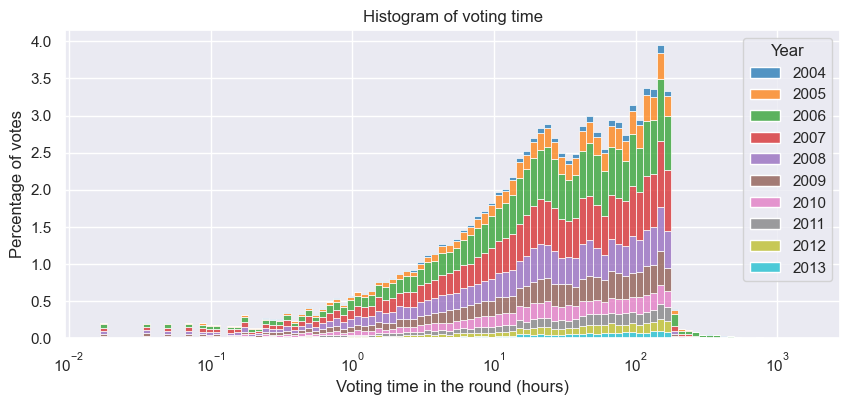

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
kde = sns.histplot(data=df_plot, x='Voting_time', ax=ax, bins=100, stat='percent', log_scale=(True, False), hue='Year', palette='tab10', multiple='stack')
ax.set_title('Histogram of voting time')
ax.set_xlabel('Voting time in the round (hours)')
ax.set_ylabel('Percentage of votes')
plt.show()

The resulting rounds of elections we get using this method and threshold enable 

In [ ]:
df_timeserie.to_csv('wiki-RfA_timeserie.csv')

## Vote evolution through time

In [ ]:
df_vote_evolution = df_timeserie.copy()
# Compute the progressive mean of the votes in each round (i.e. the mean of the votes at each time step)
progressive_mean = df_vote_evolution.groupby(['Target', 'Round']).apply(lambda x: x.Vote.cumsum() / np.arange(1, len(x)+1)).rename('progressive_mean')
# Replace the column Vote by the progressive mean
df_vote_evolution = df_vote_evolution.join(progressive_mean.droplevel([0,1]))
df_vote_evolution

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,progressive_mean
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0.000000,1.000000
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1,1.850000,1.000000
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,1,0.500000,1.000000
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1,0.966667,1.000000
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1,1.716667,1.000000
...,...,...,...,...,...,...,...,...,...,...
198066,Lst27,Yelyos,-1,-1,2004,2004-11-16 23:57:00,Support after 1200 edits. --,1,47.300000,0.285714
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work,1,111.433333,0.200000
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...,1,134.750000,0.125000
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...,1,139.200000,0.058824


In [ ]:
#Convert in timedelta
df_vote_evolution.Voting_time = pd.to_timedelta(df_vote_evolution.Voting_time, unit='h')
df_vote_evolution.sort_values('Voting_time', inplace=True)
display(df_vote_evolution)
rolling_avg = df_vote_evolution.groupby('Results').rolling('1h', on='Voting_time').progressive_mean.aggregate(['mean', 'std']).reset_index(level='Voting_time')
rolling_avg.Voting_time = rolling_avg.Voting_time.dt.total_seconds()/3600
display(rolling_avg)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,progressive_mean
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0 days 00:00:00,1.0
151494,Celestianpower,Where,1,1,2006,2006-06-25 21:18:00,'''The biggest support I've ever given''' (apa...,1,0 days 00:00:00,1.0
155206,Sjakkalle,Bling-chav,-1,-1,2006,2006-02-02 15:57:00,Account made only a few days ago. Zero contrib...,1,0 days 00:00:00,-1.0
18504,Boing! said Zebedee,Wcreed88,-1,-1,2011,2011-02-12 18:23:00,'''Oppose'''. Bad reason for wanting to be an ...,1,0 days 00:00:00,-1.0
174641,Michael Snow,Dragons flight,1,1,2005,2005-08-13 05:09:00,NaN,1,0 days 00:00:00,1.0
...,...,...,...,...,...,...,...,...,...,...
195405,172,Roadrunner,1,1,2004,2004-02-03 20:02:00,Support. I thought that Roadrunner was an admi...,1,35 days 02:24:00,1.0
105810,Blnguyen,SchuminWeb,1,1,2007,2007-06-12 00:26:00,'''Support''' - good contributor. ''',1,35 days 03:06:00,1.0
105811,Captain panda,SchuminWeb,1,1,2007,2007-06-12 01:17:00,'''Support''' A good one to have the tools.,1,35 days 03:57:00,1.0
105812,Vision Thing,SchuminWeb,1,1,2007,2007-06-12 19:23:00,'''Support''' I had some doubts on his last Rf...,1,35 days 22:03:00,1.0


,Voting_time,mean,std
Results,,,
-1,0.000000,-1.000000,NaN
-1,0.000000,-1.000000,0.000000
-1,0.000000,-1.000000,0.000000
-1,0.000000,-0.666667,0.666667
-1,0.000000,-0.333333,0.942809
...,...,...,...
1,842.400000,1.000000,NaN
1,843.100000,1.000000,0.000000
1,843.950000,1.000000,0.000000


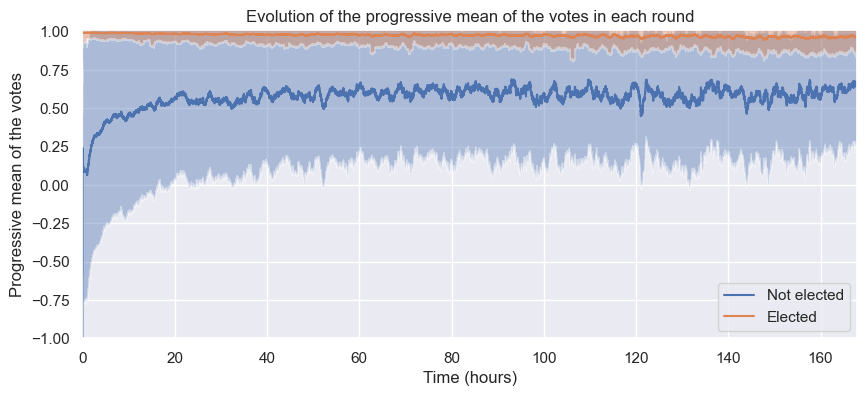

In [ ]:
# Plot the evolution of the progressive mean of the votes in each round given rolling average
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(rolling_avg.loc[-1].Voting_time, rolling_avg.loc[-1]['mean'], label='Not elected')
ax.fill_between(rolling_avg.loc[-1].Voting_time, rolling_avg.loc[-1]['mean']-rolling_avg.loc[-1]['std'], rolling_avg.loc[-1]['mean']+rolling_avg.loc[-1]['std'], alpha=0.4)
ax.plot(rolling_avg.loc[1].Voting_time, rolling_avg.loc[1]['mean'], label='Elected')
ax.fill_between(rolling_avg.loc[1].Voting_time, rolling_avg.loc[1]['mean']-rolling_avg.loc[1]['std'], rolling_avg.loc[1]['mean']+rolling_avg.loc[1]['std'], alpha=0.4)
ax.set_title('Evolution of the progressive mean of the votes in each round')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Progressive mean of the votes')
ax.set_xlim(0, 24*7)
ax.set_ylim(-1, 1.01)
ax.legend(loc='lower right')
plt.show()    

In [ ]:
df_vote_evolution.groupby('Results')[['progressive_mean']].agg(['mean', 'std'])

progressive_mean          
                    mean       std
Results                           
-1              0.454460  0.636774
 1              0.982224  0.074236

AttributeError: PathCollection.set() got an unexpected keyword argument 'hue'

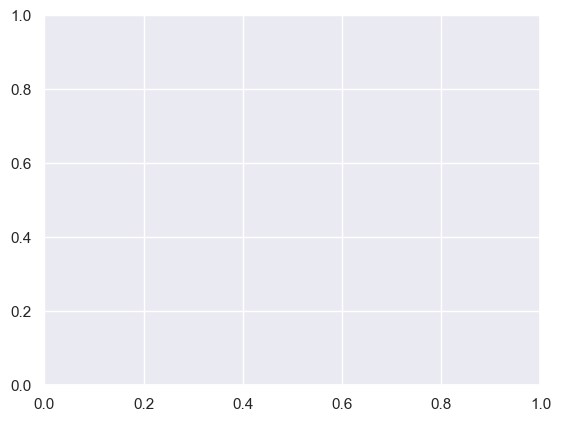

In [ ]:
# Plot the evolution of 'Vote' over 'Voting_time' by averaging over the positive and negative results
# Plot the progressive average of the vote over time
df_vote_evolution.plot(kind='scatter', x='Voting_time', y='progressive_mean', subplots=False, alpha=1, hue='Results')
sns.
plt.title('Evolution of the vote over time')
plt.xlabel('Voting time (min)')
plt.ylabel('Vote')
plt.xlim(0,600)
plt.show()

KeyboardInterrupt: 

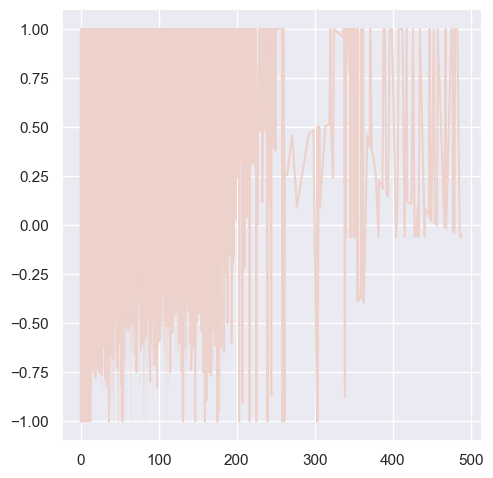

In [ ]:
#sns.relplot(data=df_vote_evolution, x="Voting_time", y="progressive_mean", hue='Results', kind="line")

In [ ]:
# Compute moving average of progressive mean
#df_vote_evolution.groupby('Results').aggregate()